In [1]:
from scLENS2 import scLENS2
import pandas as pd
import cupy
import scanpy as sc

/home/khyeonmin/micromamba/envs/whatshap_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('./Z8eq.csv')
df

,cell,ENSG00000237683,Unknown,LINC01409,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,MT-ND6,MT-CYB,ENSG00000215750,ENSG00000215781,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215764,ENSG00000215700,ENSG00000215699
0,b.cells,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3990,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3991,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3992,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 세포 정보 추출 (cell 열)
obs = pd.DataFrame(df['cell']) 

# 유전자 발현 데이터 추출 (두 번째 열부터)
X = df.iloc[:, 1:].values 

# 유전자 메타데이터 생성 (열 이름 사용)
var = pd.DataFrame(df.columns[1:])
var.columns = ['gene'] 

# AnnData 객체 생성
adata = sc.AnnData(X, obs=obs, var=var)

adata

/home/khyeonmin/micromamba/envs/whatshap_env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/khyeonmin/micromamba/envs/whatshap_env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 3994 × 15716
    obs: 'cell'
    var: 'gene'

In [4]:
adata.raw = adata.copy()
adata.raw = sc.AnnData(adata.X.copy(), obs=adata.obs.copy(), var=adata.var.copy())
adata.raw.shape

(3994, 15716)

In [5]:
sclens = scLENS2.scLENS2()

CPU Memory Usage: 2684.34 MB
(0.0, 0.0)
Removed 0 cells and 6065 genes in QC


/home/khyeonmin/projects/scLENS/scLENS2/scLENS2.py:141: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  data.uns['preprocess_mean_plot'] = fig1


CPU Memory Usage: 4668.21 MB
(294.08349609375, 1176.365234375)


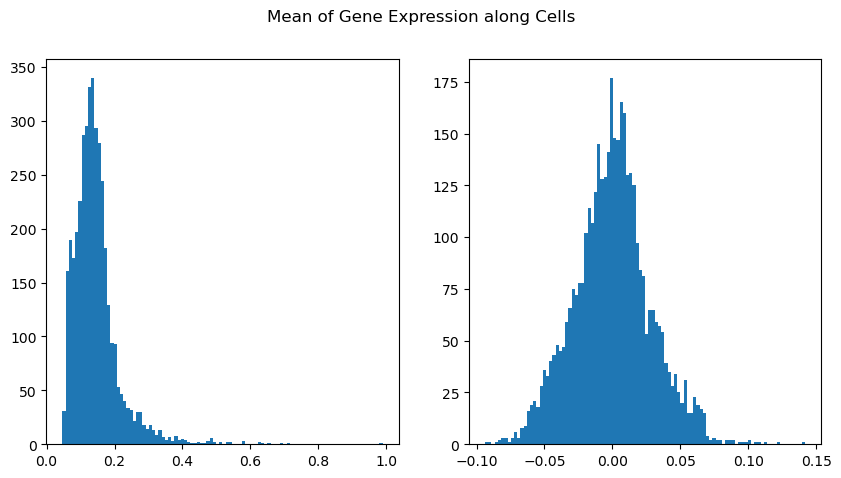

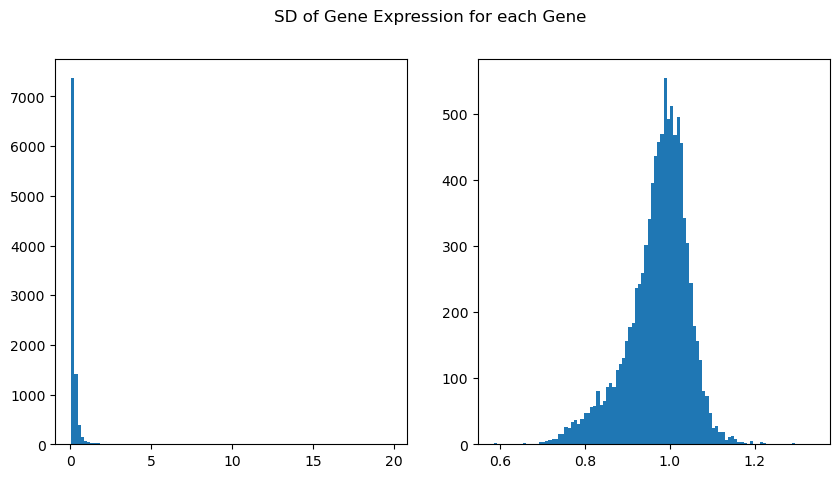

In [6]:
_, adata = sclens.preprocess(adata, plot = True)

In [7]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot'

CPU Memory Usage: 4669.14 MB
(0.0, 1176.365234375)
gene is more than cell
gene is more than cell
Max interactions exceeded!
Number of signal components: 16
L_mp type: <class 'cupy.ndarray'>
L_mp shape: (3975,)


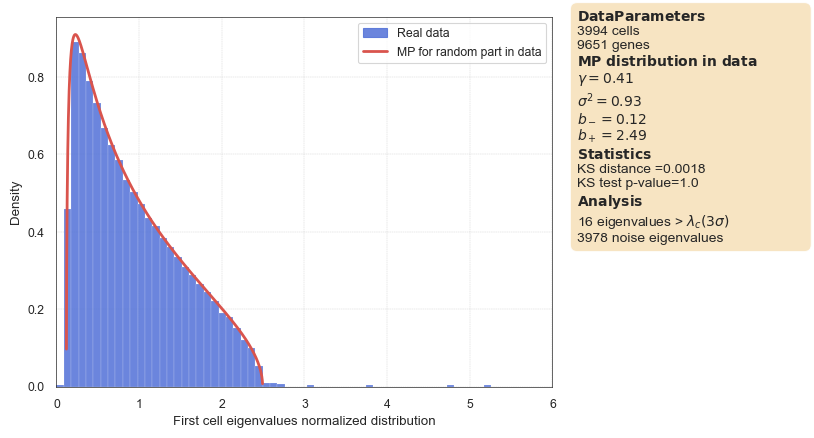

sparsity_th: 0.06001289427295246
Min(corr): 0.0941020948422473, sparsity: 0.999, add_ilen: (38546,)
Min(corr): 0.07890841474123861, sparsity: 0.998, add_ilen: (77092,)
Min(corr): 0.07046961528104065, sparsity: 0.997, add_ilen: (115638,)
Min(corr): 0.06575696519992934, sparsity: 0.996, add_ilen: (154184,)
Min(corr): 0.06136534489815672, sparsity: 0.995, add_ilen: (192730,)
Min(corr): 0.06148114372060905, sparsity: 0.994, add_ilen: (231276,)
Min(corr): 0.05907768852011504, sparsity: 0.993, add_ilen: (269822,)
Min(corr): 0.05734884696496989, sparsity: 0.992, add_ilen: (308368,)
Min(corr): 0.05744761576138111, sparsity: 0.991, add_ilen: (346914,)
Min(corr): 0.05579462207308637, sparsity: 0.99, add_ilen: (385460,)
Min(corr): 0.05476107348846978, sparsity: 0.989, add_ilen: (424007,)


100%|██████████| 20/20 [00:55<00:00,  2.78s/it]


CPU Memory Usage: 4719.11 MB
(659.59375, 3137.72216796875)


In [8]:
X_transform = sclens.fit_transform(plot_mp=True)

In [9]:
X_transform

array([[ 0.04105718, -0.03826169, -0.02644869, ..., -0.14582109,
         0.06994112, -0.02711196],
       [ 0.02534541, -0.00069116, -0.02015234, ..., -0.13098915,
         0.07156501, -0.03700359],
       [ 0.00774764,  0.00759813, -0.02913346, ..., -0.13624159,
         0.05192215, -0.0357052 ],
       ...,
       [-0.00412252,  0.00800009,  0.00269003, ...,  0.02358551,
        -0.06861508,  0.0384025 ],
       [ 0.02841542, -0.01079739,  0.00910996, ...,  0.02328334,
        -0.00856293, -0.05428069],
       [ 0.01457923,  0.03640545,  0.01290544, ...,  0.03067032,
        -0.01833608, -0.08521219]])

In [10]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot'
    obsm: 'PCA_scLENS'

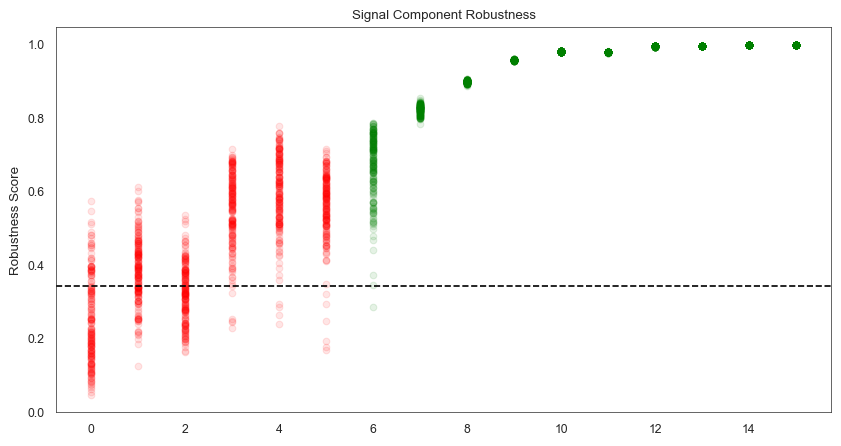

In [11]:
sclens.plot_robust_score()

In [12]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot'
    obsm: 'PCA_scLENS'

In [13]:
adata.obsm['PCA_scLENS']

array([[ 0.04105718, -0.03826169, -0.02644869, ..., -0.14582109,
         0.06994112, -0.02711196],
       [ 0.02534541, -0.00069116, -0.02015234, ..., -0.13098915,
         0.07156501, -0.03700359],
       [ 0.00774764,  0.00759813, -0.02913346, ..., -0.13624159,
         0.05192215, -0.0357052 ],
       ...,
       [-0.00412252,  0.00800009,  0.00269003, ...,  0.02358551,
        -0.06861508,  0.0384025 ],
       [ 0.02841542, -0.01079739,  0.00910996, ...,  0.02328334,
        -0.00856293, -0.05428069],
       [ 0.01457923,  0.03640545,  0.01290544, ...,  0.03067032,
        -0.01833608, -0.08521219]])

# clustering

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import datashader as ds
import bokeh
import holoviews as hv
from skimage import data
import colorcet
import umap
import umap.plot

/home/khyeonmin/micromamba/envs/whatshap_env/lib/python3.10/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/home/khyeonmin/micromamba/envs/whatshap_env/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/khyeonmin/micromamba/envs/whatshap_env/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than o

In [15]:
# umap은 기본적으로 numpy 배열 사용 필요!!
X_transform_np = X_transform.get()

print(type(X_transform_np))
mapper = umap.UMAP(metric='cosine').fit(X_transform_np)

/home/khyeonmin/micromamba/envs/whatshap_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<class 'numpy.ndarray'>


In [16]:
from scLENS2.clustering import find_clusters, chooseR

In [17]:
print(X_transform_np)

[[ 0.04105718 -0.03826169 -0.02644869 ... -0.14582109  0.06994112
  -0.02711196]
 [ 0.02534541 -0.00069116 -0.02015234 ... -0.13098915  0.07156501
  -0.03700359]
 [ 0.00774764  0.00759813 -0.02913346 ... -0.13624159  0.05192215
  -0.0357052 ]
 ...
 [-0.00412252  0.00800009  0.00269003 ...  0.02358551 -0.06861508
   0.0384025 ]
 [ 0.02841542 -0.01079739  0.00910996 ...  0.02328334 -0.00856293
  -0.05428069]
 [ 0.01457923  0.03640545  0.01290544 ...  0.03067032 -0.01833608
  -0.08521219]]


In [18]:
resolution = chooseR(X_transform_np, reps=5, n_jobs=-1) 
print(resolution)

ChooseR:   0%|          | 0/39 [00:00<?, ?it/s]

GPU is not available, function will be run in CPU


ChooseR:   3%|▎         | 1/39 [00:13<08:45, 13.82s/it]

GPU is not available, function will be run in CPU


ChooseR:   5%|▌         | 2/39 [00:20<05:53,  9.55s/it]

GPU is not available, function will be run in CPU


ChooseR:   8%|▊         | 3/39 [00:27<04:57,  8.25s/it]

GPU is not available, function will be run in CPU


ChooseR:  10%|█         | 4/39 [00:33<04:27,  7.65s/it]

GPU is not available, function will be run in CPU


ChooseR:  13%|█▎        | 5/39 [00:40<04:06,  7.25s/it]

GPU is not available, function will be run in CPU


ChooseR:  15%|█▌        | 6/39 [00:47<03:54,  7.12s/it]

GPU is not available, function will be run in CPU


ChooseR:  18%|█▊        | 7/39 [00:54<03:46,  7.09s/it]

GPU is not available, function will be run in CPU


ChooseR:  21%|██        | 8/39 [01:01<03:41,  7.14s/it]

GPU is not available, function will be run in CPU


ChooseR:  23%|██▎       | 9/39 [01:05<03:02,  6.08s/it]

GPU is not available, function will be run in CPU


ChooseR:  26%|██▌       | 10/39 [01:09<02:39,  5.49s/it]

GPU is not available, function will be run in CPU


ChooseR:  28%|██▊       | 11/39 [01:13<02:20,  5.00s/it]

GPU is not available, function will be run in CPU


ChooseR:  31%|███       | 12/39 [01:17<02:04,  4.61s/it]

GPU is not available, function will be run in CPU


ChooseR:  33%|███▎      | 13/39 [01:21<01:59,  4.60s/it]

GPU is not available, function will be run in CPU


ChooseR:  36%|███▌      | 14/39 [01:26<01:54,  4.59s/it]

GPU is not available, function will be run in CPU


ChooseR:  38%|███▊      | 15/39 [01:29<01:40,  4.18s/it]

GPU is not available, function will be run in CPU


ChooseR:  41%|████      | 16/39 [01:33<01:35,  4.15s/it]

GPU is not available, function will be run in CPU


ChooseR:  44%|████▎     | 17/39 [01:37<01:29,  4.08s/it]

GPU is not available, function will be run in CPU


ChooseR:  46%|████▌     | 18/39 [01:41<01:26,  4.13s/it]

GPU is not available, function will be run in CPU


ChooseR:  49%|████▊     | 19/39 [01:45<01:22,  4.12s/it]

GPU is not available, function will be run in CPU


ChooseR:  51%|█████▏    | 20/39 [01:49<01:17,  4.10s/it]

GPU is not available, function will be run in CPU


ChooseR:  54%|█████▍    | 21/39 [01:53<01:11,  3.97s/it]

GPU is not available, function will be run in CPU


ChooseR:  56%|█████▋    | 22/39 [01:57<01:07,  3.99s/it]

GPU is not available, function will be run in CPU


ChooseR:  59%|█████▉    | 23/39 [02:00<01:01,  3.83s/it]

GPU is not available, function will be run in CPU


ChooseR:  62%|██████▏   | 24/39 [02:05<00:58,  3.91s/it]

GPU is not available, function will be run in CPU


ChooseR:  64%|██████▍   | 25/39 [02:08<00:54,  3.92s/it]

GPU is not available, function will be run in CPU


ChooseR:  67%|██████▋   | 26/39 [02:13<00:52,  4.06s/it]

GPU is not available, function will be run in CPU


ChooseR:  69%|██████▉   | 27/39 [02:18<00:50,  4.24s/it]

GPU is not available, function will be run in CPU


ChooseR:  72%|███████▏  | 28/39 [02:21<00:45,  4.09s/it]

GPU is not available, function will be run in CPU


ChooseR:  74%|███████▍  | 29/39 [02:25<00:40,  4.03s/it]

GPU is not available, function will be run in CPU


ChooseR:  77%|███████▋  | 30/39 [02:29<00:34,  3.89s/it]

GPU is not available, function will be run in CPU


ChooseR:  79%|███████▉  | 31/39 [02:33<00:30,  3.86s/it]

GPU is not available, function will be run in CPU


ChooseR:  82%|████████▏ | 32/39 [02:36<00:27,  3.89s/it]

GPU is not available, function will be run in CPU


ChooseR:  85%|████████▍ | 33/39 [02:41<00:23,  3.99s/it]

GPU is not available, function will be run in CPU


ChooseR:  87%|████████▋ | 34/39 [02:44<00:19,  3.91s/it]

GPU is not available, function will be run in CPU


ChooseR:  90%|████████▉ | 35/39 [02:48<00:15,  3.86s/it]

GPU is not available, function will be run in CPU


ChooseR:  92%|█████████▏| 36/39 [02:52<00:11,  3.89s/it]

GPU is not available, function will be run in CPU


ChooseR:  95%|█████████▍| 37/39 [02:56<00:07,  3.97s/it]

GPU is not available, function will be run in CPU


ChooseR:  97%|█████████▋| 38/39 [03:00<00:04,  4.04s/it]

GPU is not available, function will be run in CPU


ChooseR: 100%|██████████| 39/39 [03:05<00:00,  4.74s/it]

(np.float64(0.45),      res  n_clusters   low_med       med
26  1.95          20  0.512250  0.626043
38  1.90          19  0.516540  0.825899
19  1.85          18  0.584726  0.735391
37  1.65          17  0.541261  0.815267
32  1.80          16  0.543577  0.786268
13  1.75          16  0.660552  0.854796
25  1.70          16  0.565998  0.685653
31  1.55          15  0.452073  0.795102
36  1.40          14  0.535816  0.815748
18  1.60          14  0.502775  0.815185
24  1.45          14  0.474844  0.738867
17  1.35          14  0.614113  0.883963
12  1.50          13  0.687050  0.844405
30  1.30          13  0.618347  0.847991
11  1.25          13  0.580206  0.900128
23  1.20          13  0.250019  0.895204
10  1.00          12  0.455230  0.945578
29  1.05          12  0.688088  0.918256
16  1.10          12  0.827811  0.902254
35  1.15          12  0.329039  0.935958
34  0.90          11  0.738060  0.871975
20  0.95          11 -0.454759  0.945955
6   0.45          10  0.834636  0.9525

In [19]:
# resolution 찾고 바로 clustering 코드 실행하면 tuple이 아니라 real number이어야 한다는 오류 떠서 추가함
if isinstance(resolution, (tuple, list)):
    resolution = resolution[0]
print(resolution)

0.45


In [36]:
clustering = find_clusters(X_transform_np, res=resolution)

In [ ]:
umap.plot.points(mapper, labels=clustering)

# scanpy와 호환성

In [22]:
adata.obsm['PCA_scLENS'] = adata.obsm['PCA_scLENS'].get()
sc.pp.neighbors(adata, use_rep='PCA_scLENS')

In [23]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot', 'neighbors'
    obsm: 'PCA_scLENS'
    obsp: 'distances', 'connectivities'

In [24]:
sc.tl.umap(adata)

/tmp/ipykernel_1312634/2406609555.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.0)


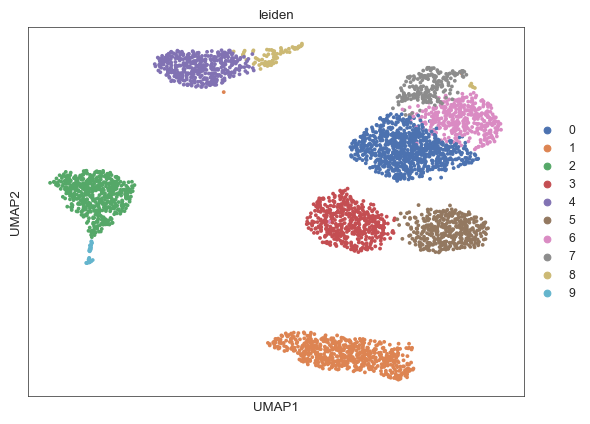

In [25]:
sc.tl.leiden(adata, resolution=1.0)
sc.pl.umap(adata, color='leiden')

In [26]:
adata

AnnData object with n_obs × n_vars = 3994 × 9651
    obs: 'cell', 'leiden'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'PCA_scLENS', 'X_umap'
    obsp: 'distances', 'connectivities'